In [2]:
import matplotlib.pyplot as plt
import numpy as np
import signac
import gsd.hoomd

In [3]:
project = signac.get_project("/home/stephaniemccallu/scratch/Entanglements")

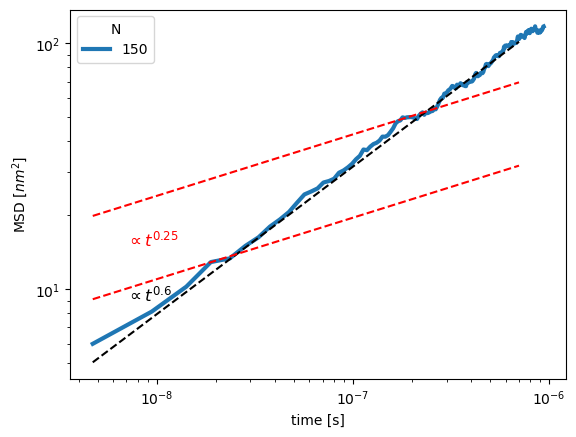

In [32]:
for length, jobs in project.find_jobs({"doc.sampled":True}).groupby("doc.lengths"):
    for job in jobs:
        if length ==150:
            time = np.load(job.fn("msd_time_bs.npy"))
            msd_nm = np.load(job.fn("msd_data_real_nm_squared_bs.npy"))
            '''shifted_msd_nm = np.zeros((len(msd_nm)))
            for i in range(0,len(msd_nm)):
                shifted_msd_nm[i] = msd_nm[i]-msd_nm[1]
            plt.plot(time[1:], shifted_msd_nm[1:], linewidth=3, label=length)'''
            plt.plot(time[1:], msd_nm[1:], linewidth=3, label=length)
plt.plot(
    time[1:150],
    time[1:150]**(0.6) * 5e5,
    color="black",
    linestyle="--"
)

plt.plot(
    time[1:150],
    time[1:150]**(0.25) * 11e2,
    color="red",
    linestyle="--"
)

plt.plot(
    time[1:150],
    time[1:150]**(0.25) * 24e2,
    color="red",
    linestyle="--"
)
'''plt.plot(
    time[10:],
    time[10:] * 4e8,
    color="black",
    linestyle="--"
)'''
plt.text(0.7e-8, 9, "$\propto t^{0.6}$",fontsize=12, color="black")
plt.text(0.7e-8, 15, "$\propto t^{0.25}$",fontsize=12, color="red")
#plt.text(0.7e-7, 25, "$\propto t$",fontsize=12, color="black")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("time [s]")
plt.ylabel("MSD [$nm^2]$")
plt.legend(title="N")